In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%%time
#source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
epoches = 1
lr = 0.001
momentum = 0.9
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cuda
Files already downloaded and verified
Files already downloaded and verified
CPU times: user 1.44 s, sys: 313 ms, total: 1.75 s
Wall time: 1.78 s


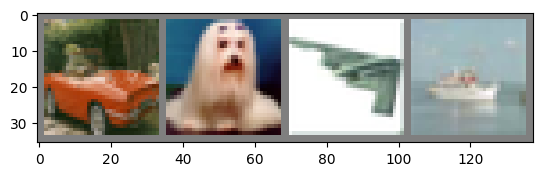

car   dog   plane ship 
CPU times: user 341 ms, sys: 78 ms, total: 419 ms
Wall time: 280 ms


In [3]:
%%time
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
%%time
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

CPU times: user 888 ms, sys: 630 ms, total: 1.52 s
Wall time: 1.57 s


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
%%time
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = lr, momentum = momentum)

CPU times: user 267 µs, sys: 64 µs, total: 331 µs
Wall time: 336 µs


In [6]:
%%time
for epoch in range(epoches):  # loop over the dataset multiple times 20

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.147
[1,  4000] loss: 1.819
[1,  6000] loss: 1.649
[1,  8000] loss: 1.565
[1, 10000] loss: 1.470
[1, 12000] loss: 1.453
Finished Training
CPU times: user 44.3 s, sys: 3.2 s, total: 47.5 s
Wall time: 49.9 s


In [7]:
%%time
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

CPU times: user 6.67 ms, sys: 0 ns, total: 6.67 ms
Wall time: 5.52 ms


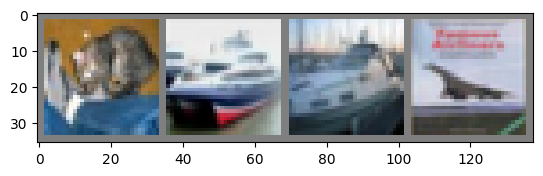

GroundTruth:  cat   ship  ship  plane
CPU times: user 196 ms, sys: 140 ms, total: 336 ms
Wall time: 353 ms


In [8]:
%%time
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
%%time
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)

CPU times: user 10.4 ms, sys: 228 µs, total: 10.7 ms
Wall time: 8.62 ms


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
%%time
outputs = net(images.to(device))

CPU times: user 2.64 ms, sys: 248 µs, total: 2.89 ms
Wall time: 2.16 ms


In [11]:
%%time
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 
CPU times: user 1.37 ms, sys: 128 µs, total: 1.49 ms
Wall time: 946 µs


In [12]:
%%time
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 47 %
CPU times: user 3.77 s, sys: 671 ms, total: 4.44 s
Wall time: 5.76 s


In [13]:
%%time
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 21.8 %
Accuracy for class: car   is 64.2 %
Accuracy for class: bird  is 32.6 %
Accuracy for class: cat   is 15.6 %
Accuracy for class: deer  is 26.8 %
Accuracy for class: dog   is 54.4 %
Accuracy for class: frog  is 63.5 %
Accuracy for class: horse is 70.5 %
Accuracy for class: ship  is 74.6 %
Accuracy for class: truck is 53.5 %
CPU times: user 4.28 s, sys: 644 ms, total: 4.93 s
Wall time: 5.82 s
